# Numerical Root-finding by using Bracketing and Open methods.
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

# Abstract
This report will demostrate two kind of methods - Bracketing and Open, each of them has two divisions. Bracketing methods include bisection and false-postion methods. Open methods are fixed-point iteration and Newton-Raphson methods. All of them are used to find numerical root of an equation. Here, practical results will show correctness of theoretical arguments. Also we will compare all methods betweeen each other with different initial guesses.

## Introduction
All four methods are useful for finding a root of equation, but they all have different aspects of usage.
### Theory
The algorithm of each of the method is described in Chapra and Canale's book. As we can see, all of them require an initial guess or guesses for determination of the roots and update them before error becomes acceptable. Let's see the formulas for each of the methods:

Bisection
\begin{equation*}
x_r = \frac{x_l+x_u}{2}
\end{equation*}
False-position
\begin{equation*}
x_r = x_u-\frac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}
\end{equation*}
Fixed-point iteration
\begin{equation*}
x_{i+1} = g(x_i)
\end{equation*}
Newton Raphson
\begin{equation*}
x_{i+1} = x_i-\frac{f(x_i)}{f'(x_i)}
\end{equation*}
All methods work while acceptable error is not occurred or for maximal number of allowed iterations. 

Error changes by means of this formula:
\begin{equation*}
e_i = |\frac{x_i-x_{i-1}}{x_i}|\times100
\end{equation*}
From Chapra and Canale's book we know that bracketing methods always converge. However, open methods may diverge, so the convergence of the fixed-point method depends on our choice of $g(x)$. In the case when it converges, $|g'(x)|<1$

# Formulation of the problem
We will use four methods to find numerical root of this equation: 
 \begin{equation*}
f(x) = \epsilon^{0.5x}-5+5x 
\end{equation*}
With a acceptable error $10^{-10}$ in each method.
 

# Methods with Discussion
For coding part let introduce these packages to use lists, make plots and use math functions:

In [141]:
from matplotlib.pyplot import *
%matplotlib inline
from math import exp
from math import log

Now define function with derivative. Also we will define "g(x)" function for Fixed-point method.

In [142]:
def f(x):
    return exp(0.5*x)-5+5*x

def df(x):
    return 0.5*exp(0.5*x)+5

def g(x):
    return f(x) + x

Next step we see all 4 methods in this order:

Bisection, False-position, Fixed-point and Newton Raphson.

First two of them use $x_u$ and $x_l$ as initial guesses to find $x_r$, whereas last two of them use one initial guess. All methods use lists to store positions, errors and number of iteration in each iteration. All use loops to have fixed number of iterations, update values of guesses and stop when error is acceptable($ea$<$es$). However they can finish iteration when iteration number is bigger than $imax$. As it's written above all methods are more deeply described in Chapra and Canale book.

In [143]:
def bisect(xl,xu,es,imax):
    xr=0.0
    x=[];e=[];it=[]
    for i in range(imax):
        xrold=xr
        xr=0.5*(xl+xu)        
        if (xr != 0.0):
            ea=abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        test=f(xl)*f(xr)
        if (test<0.0):
            xu=xr
        elif (test>0.0):
            xl=xr
        else:
            ea=0.0
        if (ea<es):
            break
    return it,xr,e

def falsep(xl,xu,es,imax):
    xr=0.0
    x=[];e=[];it=[]
    for i in range(imax):
        xrold=xr
        xr=xu-f(xu)*(xl-xu)/(f(xl)-f(xu))
        if (xr != 0.0):
            ea=abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        test=f(xl)*f(xr)
        if (test<0.0):
            xu=xr
        elif (test>0.0):
            xl=xr
        else:
            ea=0.0
        if (ea<es):
            break
    return it,xr,e

def fixpt(x0,es,imax):
    xr=x0
    x=[];e=[];it=[]
    for i in range(imax):
        xrold=xr
        xr=g(xrold)
        if (xr!=0):
            ea=abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        if (ea<es):
            break
    return it,xr,e

def nr(x0,es,imax):
    xr=x0
    x=[];e=[];it=[]
    for i in range(imax):
        xrold=xr
        xr=xrold-f(xrold)/df(xrold)
        if (xr!=0):
            ea=abs((xr-xrold)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        if (ea<es):
            break
    return it,xr,e

Next part of code demonstrate graphical method to estimate the region where the root equaiton is located. It createad a graph to show us that region. We will use 200 steps of size 0.1 to plot graph from -10 to 10.  

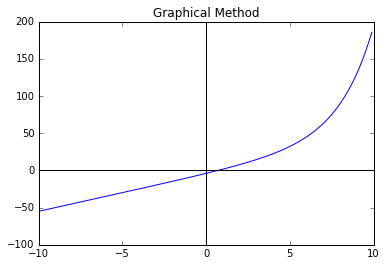

In [144]:
n = 200; a1 = []; a2 = -10.0; y = [];
for i in range(n):
    a1.append(a2 + i * (0.1));
    y.append(f(a2 + i * (0.1)))
plot(a1, y)
axhline(0, color='black')
axvline(0, color='black')
title('Graphical Method')
show()

As we can see the region of numerical root betweem 0 and 5, it closer to 0. 

Now let's start to use bracketing and open methods. For all method we will have $i_i$, $x_i$ and $e_i$. They are numbers of iterations, the last founded $x$ posision and errors.

Here we use Bisection method with brackets $x_l = 0$ and $x_u = 1$ . We determine root of equation of bisection method.

In [145]:
i1,x1,e1=bisect(0,1,1e-10,100)
print("root = ",x1)

root =  0.7141687150292455


Here we use false-position method with brackets $x_l = 0$ and $x_u = 1$. We determine root of equation of false-positon method.

In [146]:
i2,x2,e2=falsep(0,1,1e-10,100)
print("root = ",x2)

root =  0.714168715029385


Here we use fixed-point iteration method with initial guess $x_0 = 1$. We determine root of equation of false-positon method. As you can see above we used $g(x) = f(x) + x$. Also we will see a graph shows us error is extremaly increasing, because of $g'(x)$ diverges. It means we can not find root of equation.

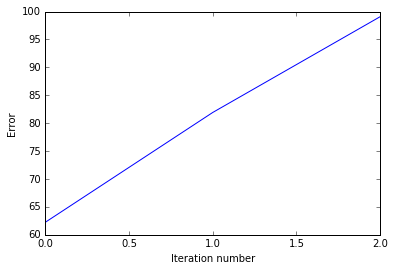

In [147]:
i3,x3,e3=fixpt(1,1e-10,3)
xlabel("Iteration number"); ylabel("Error")
plot(i3,e3,label="Fixpt"); 

Lets's define new $g(x)$
\begin{equation*}
\epsilon^{0.5x}-5+5x=0
=>x=1-\frac{\epsilon^{0.5x}}{5}\\
g'(x) = -\frac{1}{10}\epsilon^{0.5x}\\
g'(1) = 0.08
\end{equation*}
and we can see that $g'(1)$ converges. Finishly we found root.


In [148]:
def g(x):
    return 1 - exp(0.5*x)/5
i3,x3,e3=fixpt(1,1e-10,100)
print("root = ", x3)

root =  0.7141687150293243


Here we use Newton-Raphson method with  initial guess $x_0 = 1$. We determine root of equation of Newton-Raphson method.

In [149]:
i4,x4,e4=nr(1,1e-10,100)
print("root = ",x4)

root =  0.714168715029389


Now we can plot total error graph of each method. 

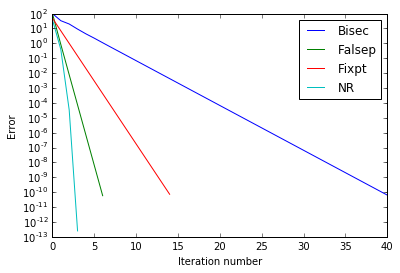

In [150]:
plot(i1,e1,label="Bisec"); 
plot(i2,e2,label="Falsep"); 
plot(i3,e3,label="Fixpt"); 
plot(i4,e4,label="NR"); 

legend()

xlabel("Iteration number"); ylabel("Error")
yscale('log')
show()

From the graph we see that Newton Raphson method is quadratically convergent, whereas Bisection, False-position and Fixed-point iteration are linearly convergent. 

Now we try to declare new brackets for Bisection and False-position and see new results.

root of Bisec =  0.714168715029615
root of Falsep =  0.7060017673846115
root of Fixpt =  0.714168715029615
root of NR =  0.7060017673846115


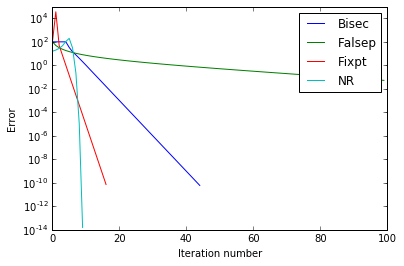

In [152]:
i1,x1,e1=bisect(0,15,1e-10,100)
i2,x2,e2=falsep(0,15,1e-10,100)
i3,x3,e3=fixpt(15,1e-10,100)
i4,x4,e4=nr(15,1e-10,100)
print("root of Bisec = ",x1)
print("root of Falsep = ",x2)
print("root of Fixpt = ",x1)
print("root of NR = ",x2)
plot(i1,e1,label="Bisec"); 
plot(i2,e2,label="Falsep"); 
plot(i3,e3,label="Fixpt"); 
plot(i4,e4,label="NR"); 
legend()
xlabel("Iteration number"); ylabel("Error")
yscale('log')
title('')
show()

The first wee see that root of False-position is not found in 100 iterations. Also we see that all lines change after new initial guesses. Because we choose new initial values, which are further from root, it occurs those initial oscillation at the beginning.  

# Conclusion
We have used four methods for finding the roots of equation. Our theoretical predictions agree with what we see in practice. Each of them has its own aspects of usage. It can be clearly seen that our prediction about fixed-point method (its divergence depends on the choice of $g(x)$) has been shown above in Discussion. In one of the cases it did not converge to the final result. We have also seen that the Newton-Raphson method is the fastest one, compared to the other three. The bracketing methods, which always converge to the final result, however, are not the fastest ones. False-position method even requires much more iterations than other methods, in case when we choose the upper bound guess far from the actual root.